In [25]:
import numpy as np
from skimage import io, color, filters
import requests
from io import BytesIO
import os
import matplotlib.pyplot as plt
import cv2

In [26]:
def carregar_imagem_github(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        img = io.imread(BytesIO(response.content))
        if len(img.shape) == 3:
            img = color.rgb2gray(img)
        return img
    except Exception as e:
        print(f"Erro ao carregar imagem do GitHub: {e}")
        return None

In [27]:
def borda_sobel(img):
    sobel_x = filters.sobel_h(img)
    sobel_y = filters.sobel_v(img)
    borda = np.hypot(sobel_x, sobel_y)
    borda = (borda / borda.max()) * 255
    return borda.astype(np.uint8)

In [28]:
def borda_sobel(img):
    sobel_x = filters.sobel_h(img)
    sobel_y = filters.sobel_v(img)
    borda = np.hypot(sobel_x, sobel_y)
    borda = (borda / borda.max()) * 255
    return borda.astype(np.uint8)

In [29]:
def borda_roberts(img):
    roberts_borda = filters.roberts(img)
    roberts_borda = (roberts_borda / roberts_borda.max()) * 255
    return roberts_borda.astype(np.uint8)

In [30]:
def exibir_metadados_github(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        img_data = response.content
        img = io.imread(BytesIO(img_data))
        altura, largura = img.shape[:2]
        tipo_arquivo = os.path.splitext(url)[1].lower()
        tamanho_bytes = len(img_data)

        print("===== Metadados da Imagem =====")
        print(f"Resolução: {largura} x {altura}")
        print(f"Tamanho do arquivo: {tamanho_bytes} bytes")
        print(f"Tipo de arquivo: {tipo_arquivo}")
        print("================================")
    except Exception as e:
        print(f"Erro ao exibir metadados: {e}")


Processando https://raw.githubusercontent.com/Vinnie-IV/Processamento-de-Imagens_E01_Grupo04/refs/heads/main/imagens/placa de carro 2.jpg...
===== Metadados da Imagem =====
Resolução: 2200 x 1467
Tamanho do arquivo: 63370 bytes
Tipo de arquivo: .jpg


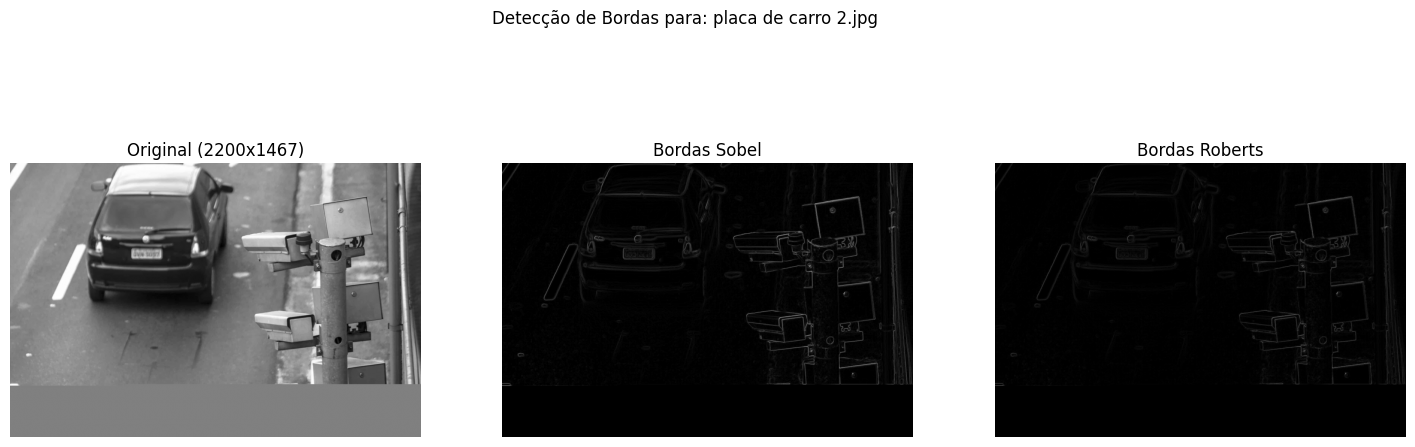


Processando https://raw.githubusercontent.com/Vinnie-IV/Processamento-de-Imagens_E01_Grupo04/refs/heads/main/imagens/placa de carro.jpg...
===== Metadados da Imagem =====
Resolução: 702 x 526
Tamanho do arquivo: 24973 bytes
Tipo de arquivo: .jpg


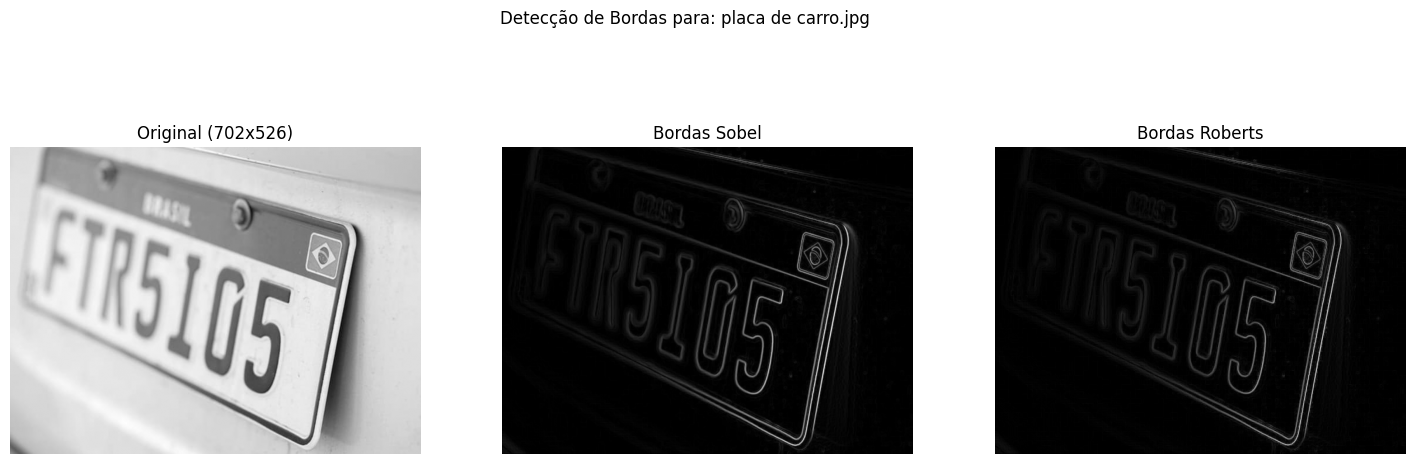

In [31]:
if __name__ == "__main__":
    imagens_github = [
        "https://raw.githubusercontent.com/Vinnie-IV/Processamento-de-Imagens_E01_Grupo04/refs/heads/main/imagens/placa de carro 2.jpg",
        "https://raw.githubusercontent.com/Vinnie-IV/Processamento-de-Imagens_E01_Grupo04/refs/heads/main/imagens/placa de carro.jpg",
    ]

    for url in imagens_github:
        print(f"\nProcessando {url}...")
        img = carregar_imagem_github(url)

        if img is not None:
            exibir_metadados_github(url)

            img_processada = img

            sobel_img = borda_sobel(img_processada)
            roberts_img = borda_roberts(img_processada)

            fig, axes = plt.subplots(1, 3, figsize=(18, 6))
            ax = axes.ravel()

            ax[0].imshow(img_processada, cmap='gray')
            ax[0].set_title(f"Original ({img_processada.shape[1]}x{img_processada.shape[0]})")

            ax[1].imshow(sobel_img, cmap='gray')
            ax[1].set_title("Bordas Sobel")

            ax[2].imshow(roberts_img, cmap='gray')
            ax[2].set_title("Bordas Roberts")

            for a in ax:
                a.axis('off')

            plt.suptitle(f"Detecção de Bordas para: {url.split('/')[-1]}")
            plt.show()

In [32]:
def carregar_imagem_github_cor(url: str):
    """
    Baixa uma imagem de uma URL (como um link 'raw' do GitHub)
    e a carrega como um objeto de imagem OpenCV.
    """
    try:
        response = requests.get(url)
        if response.status_code == 200:
            np_arr = np.frombuffer(response.content, np.uint8)
            img = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)

            if img is None:
                print(f"Erro: OpenCV não conseguiu decodificar a imagem da URL: {url}")
                return None
            return img
        else:
            print(f"Erro ao baixar imagem: Status Code {response.status_code} para {url}")
            return None
    except Exception as e:
        print(f"Erro ao carregar imagem do GitHub: {e}")
        return None

Tipo original: float64, convertendo para uint8...


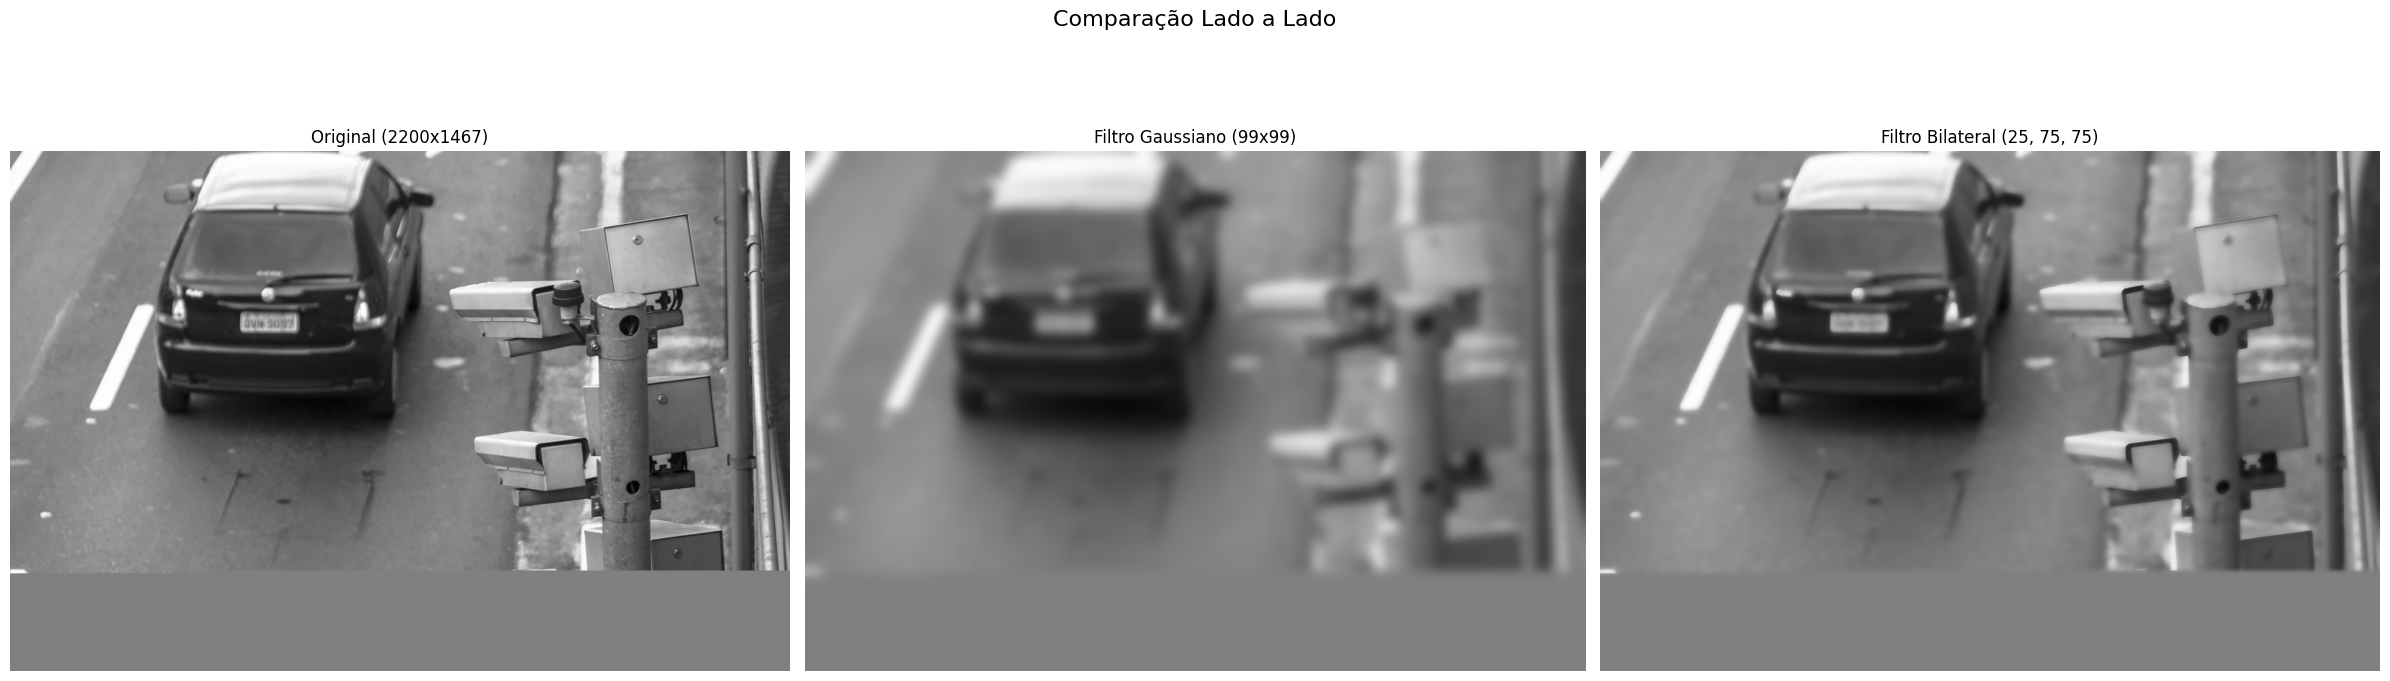

In [33]:
url_correta = "https://raw.githubusercontent.com/Vinnie-IV/Processamento-de-Imagens_E01_Grupo04/main/imagens/placa de carro 2.jpg"

img = carregar_imagem_github(url_correta)

if img is not None:
    if img.dtype != np.uint8:
        print(f"Tipo original: {img.dtype}, convertendo para uint8...")
        if img.dtype in [np.float32, np.float64]:
            img = (img * 255).astype(np.uint8)
        else:
            img = img.astype(np.uint8)

    gauss_blur = cv2.GaussianBlur(img, (99, 99), 0)
    bilateral_blur = cv2.bilateralFilter(img, 25, 75, 75)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gauss_blur_rgb = cv2.cvtColor(gauss_blur, cv2.COLOR_BGR2RGB)
    bilateral_blur_rgb = cv2.cvtColor(bilateral_blur, cv2.COLOR_BGR2RGB)

    fig, axes = plt.subplots(1, 3, figsize=(24, 8))
    ax = axes.ravel()

    ax[0].imshow(img_rgb)
    ax[0].set_title(f"Original ({img.shape[1]}x{img.shape[0]})")

    ax[1].imshow(gauss_blur_rgb)
    ax[1].set_title("Filtro Gaussiano (99x99)")

    ax[2].imshow(bilateral_blur_rgb)
    ax[2].set_title("Filtro Bilateral (25, 75, 75)")

    for a in ax:
        a.axis('off')

    plt.suptitle("Comparação Lado a Lado", fontsize=16)
    plt.tight_layout()
    plt.show()

else:
    print("A imagem não pôde ser carregada. Verifique a URL e sua conexão.")